# PCA: Diabetes

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [16]:
df = pd.read_csv('data/diabetes.csv')

X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [19]:
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Outcome'] = y.values

In [20]:
pca_df

,PC1,PC2,Outcome
0,1.068503,1.234895,1
1,-1.121683,-0.733852,0
2,-0.396477,1.595876,1
3,-1.115781,-1.271241,0
4,2.359334,-2.184819,1
...,...,...,...
763,1.562085,1.923150,0
764,-0.100405,-0.614181,0
765,-0.283475,0.097065,0
766,-1.060324,0.837062,1


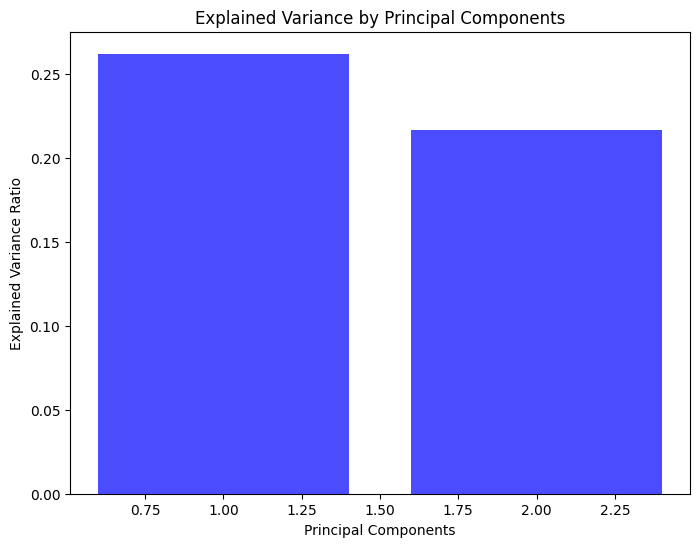

In [21]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', color='blue')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components')
plt.show()

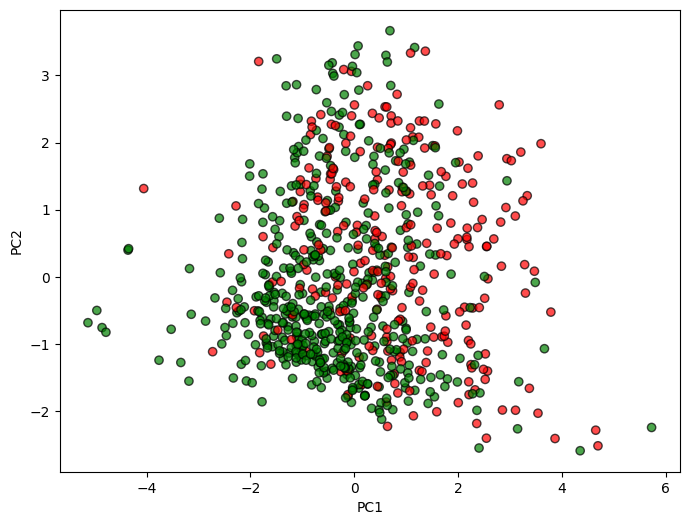

In [22]:
plt.figure(figsize=(8, 6))
colors = ['red' if outcome == 1 else 'green' for outcome in y]
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.7, edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

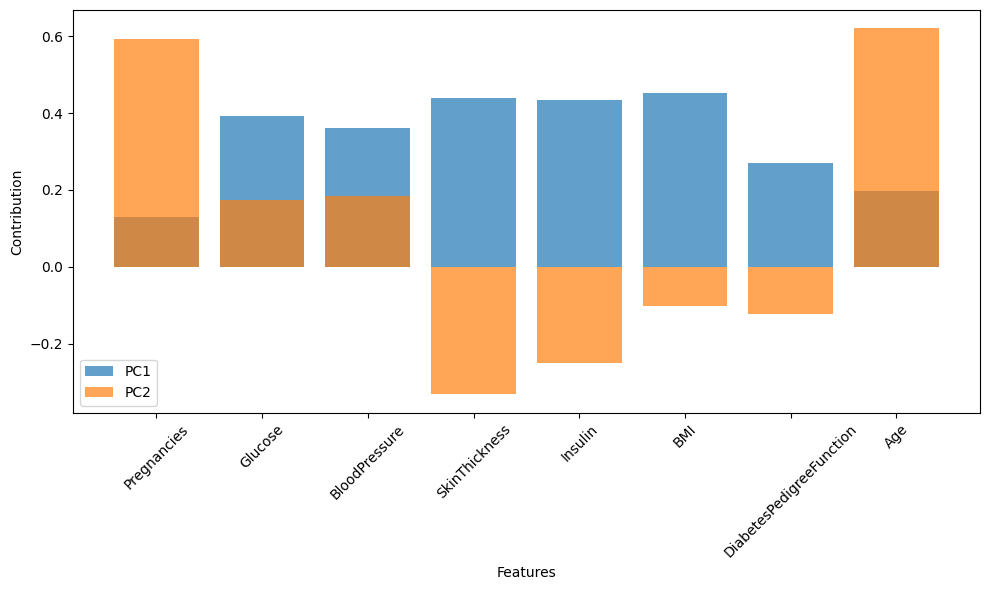

In [23]:
components = pca.components_

plt.figure(figsize=(10, 6))
features = X.columns
for i in range(2):
    plt.bar(features, components[i], alpha=0.7, label=f'PC{i+1}')
plt.xlabel('Features')
plt.ylabel('Contribution')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Comparing original data and extracted

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [25]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

classifier_orig = LogisticRegression()
classifier_orig.fit(X_train_orig, y_train_orig)

y_pred_orig = classifier_orig.predict(X_test_orig)

accuracy_orig = accuracy_score(y_test_orig, y_pred_orig)
report_orig = classification_report(y_test_orig, y_pred_orig)

print(f'Accuracy (without PCA): {accuracy_orig}')
print('Classification Report (without PCA):')
print(report_orig)

Accuracy (without PCA): 0.7532467532467533
Classification Report (without PCA):
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

classifier_pca = LogisticRegression()
classifier_pca.fit(X_train, y_train)

y_pred_pca = classifier_pca.predict(X_test)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
report_pca = classification_report(y_test, y_pred_pca)

print(f'Accuracy (with PCA): {accuracy_pca}')
print('Classification Report (with PCA):')
print(report_pca)

Accuracy (with PCA): 0.7077922077922078
Classification Report (with PCA):
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        99
           1       0.61      0.51      0.55        55

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154

